In [1]:
import math
import pandas as pd
import json
from urllib.request import urlopen
from pyproj import Proj 
import matplotlib as mpl
import matplotlib.pyplot as plt
import plot_map
import seaborn as sns
from coord_convert.transform import wgs2gcj, wgs2bd, gcj2wgs, gcj2bd, bd2wgs, bd2gcj 

In [2]:
#读取数据
locations = pd.read_excel(r'distinct_camera.xlsx')
#locations = locations.dropna()

In [22]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1412
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   camera_idxx        1413 non-null   object        
 1   camera_addr        1413 non-null   object        
 2   in_time_latest     1413 non-null   datetime64[ns]
 3   turn_dir           1110 non-null   object        
 4   camera_type        1110 non-null   object        
 5   camera_service_ip  1110 non-null   object        
 6   channel_id         1110 non-null   float64       
 7   channel_num        1110 non-null   float64       
 8   lat                1110 non-null   float64       
 9   lng                1110 non-null   float64       
 10  own_unit           1110 non-null   object        
 11  if_na              1413 non-null   int64         
 12  lat,lng            1413 non-null   object        
 13  camera_id          1413 non-null   object        
 14  citydogc

In [21]:
#locations.columns = ['ID','卡口','路口','citydogcj02lat','citydogcj02lng']

In [4]:
locations[['citydogcj02lat','citydogcj02lng']] = locations[['citydogcj02lat','citydogcj02lng']].apply(pd.to_numeric)

In [5]:
bounds = []
bounds.append(locations['citydogcj02lng'].min()-0.005)
bounds.append(locations['citydogcj02lng'].max()+0.005)
bounds.append(locations['citydogcj02lat'].min()-0.005)
bounds.append(locations['citydogcj02lat'].max()+0.005)

In [6]:
bounds

[120.22506124963363, 120.39829694821022, 30.11714606500201, 30.251465976301503]

In [20]:
bounds=[120.2,30.12,120.35,30.27]

In [8]:
locations['citydogcj02lng2']=''
locations['citydogcj02lat2']=''

In [23]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1412
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   camera_idxx        1413 non-null   object        
 1   camera_addr        1413 non-null   object        
 2   in_time_latest     1413 non-null   datetime64[ns]
 3   turn_dir           1110 non-null   object        
 4   camera_type        1110 non-null   object        
 5   camera_service_ip  1110 non-null   object        
 6   channel_id         1110 non-null   float64       
 7   channel_num        1110 non-null   float64       
 8   lat                1110 non-null   float64       
 9   lng                1110 non-null   float64       
 10  own_unit           1110 non-null   object        
 11  if_na              1413 non-null   int64         
 12  lat,lng            1413 non-null   object        
 13  camera_id          1413 non-null   object        
 14  citydogc

In [10]:
locations = locations.dropna(subset = ["citydogcj02lng","citydogcj02lat"]) 

In [11]:

for i in range(len(locations)):
    locations['citydogcj02lng2'][i],locations['citydogcj02lat2'][i] = gcj2wgs(locations['citydogcj02lng'][i],locations['citydogcj02lat'][i])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
import imp
imp.reload(plot_map)

<module 'plot_map' from 'C:\\Users\\Administrator\\Desktop\\TransBigData画图学习\\以前的plot_map包\\plot_map.py'>

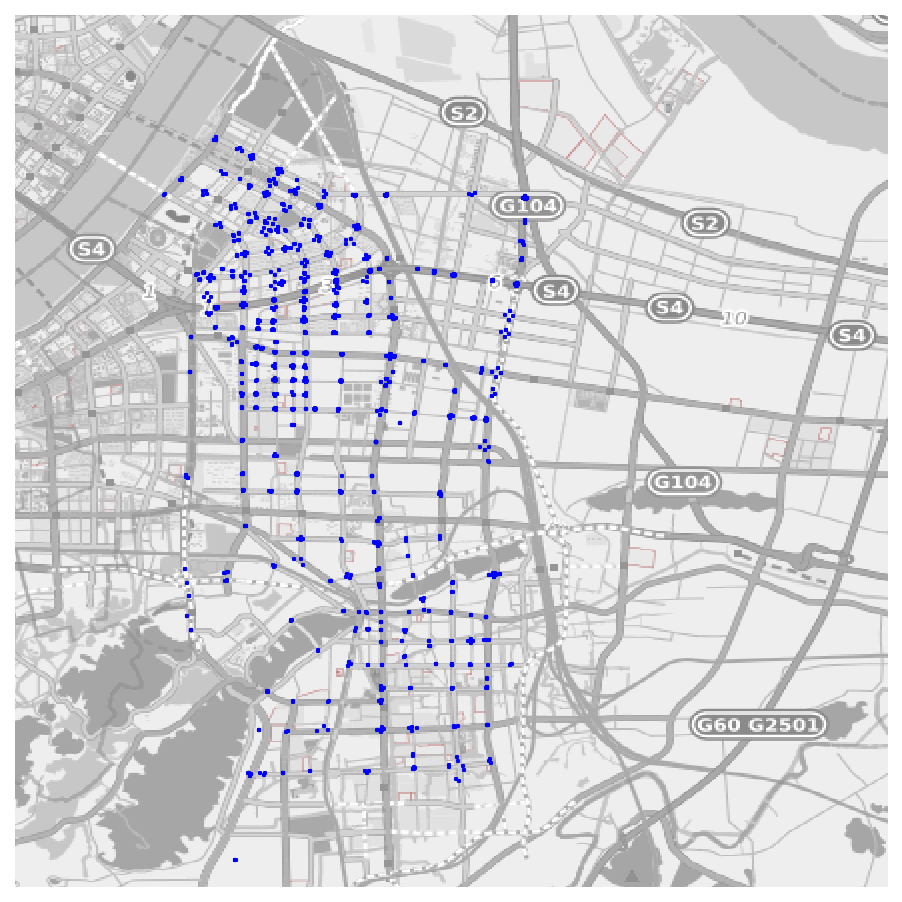

In [21]:
fig     = plt.figure(1,(8,8),dpi = 150)    
ax      = plt.subplot(111)
plt.sca(ax)
fig.tight_layout(rect = (0.05,0.1,1,0.9))

#背景
plot_map.plot_map(plt,bounds,zoom = 12,style = 4 , imgsavepath = 'C:\\Users\\Administrator\\Desktop\\TransBigData画图学习\\以前的plot_map包\\',printlog=True)


#plot scatters
plt.scatter(locations['citydogcj02lng2'],locations['citydogcj02lat2'],c = "blue" ,marker = ',',s=0.5)
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.savefig('点位图-500dpi')
plt.show()

